In [1]:
import matplotlib.pyplot as plt
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v
import numpy as np

db = Database('Issue43.tdb')
my_phases = ['FCC_A1', 'GAMMA_PRIME']
#my_phases = ['FCC_A1']

xcr = np.linspace(.15, .1846, 100)
#xcr = [1e-9, 1e-9+1e-16, 1e-9+2e-10, 1e-9+3e-10, 1e-9+4e-10, 1e-9+5e-10]#xcr[0:6]
eq = equilibrium(db, ['AL', 'NI', 'CR', 'VA'], my_phases,
                 {v.X('AL'): 0.1241, v.X('CR'): xcr, v.T: 1273, v.P: 101325},
                 verbose=False, pbar=False)
print(eq)

<xarray.Dataset>
Dimensions:       (P: 1, T: 1, X_AL: 1, X_CR: 100, component: 3, internal_dof: 6, vertex: 3)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 1.273e+03
  * X_AL          (X_AL) float64 0.1241
  * X_CR          (X_CR) float64 0.15 0.1503 0.1507 0.151 0.1514 0.1517 ...
  * vertex        (vertex) int64 0 1 2
  * component     (component) object 'AL' 'CR' 'NI'
  * internal_dof  (internal_dof) int64 0 1 2 3 4 5
Data variables:
    GM            (P, T, X_AL, X_CR) float64 -8.459e+04 -8.458e+04 ...
    NP            (P, T, X_AL, X_CR, vertex) float64 1.0 1.464e-05 3.68e-07 ...
    MU            (P, T, X_AL, X_CR, component) float64 -1.817e+05 ...
    X             (P, T, X_AL, X_CR, vertex, component) float64 0.1241 0.15 ...
    Y             (P, T, X_AL, X_CR, vertex, internal_dof) float64 0.1241 ...
    Phase         (P, T, X_AL, X_CR, vertex) object 'FCC_A1' 'FCC_A1' ...
Attributes:
    engine: pycalphad 0.3.6+39.gaccfd84.dirty
    solve_i

In [2]:
print(eq.GM)

<xarray.DataArray 'GM' (P: 1, T: 1, X_AL: 1, X_CR: 100)>
array([[[[-84585.13625292, -84582.16125536, -84579.16734178,
          -84576.15453913, -84573.12287437, -84570.0723744 ,
          -84567.00306605, -84563.91497606, -84560.80813093,
          -84557.68255678, -84554.53828087, -84551.37532891,
          -84548.19372769, -84544.9935028 , -84541.77468057,
          -84538.53728699, -84535.28134795, -84532.00688927,
          -84528.7139367 , -84525.40251589, -84522.07265251,
          -84518.72437158, -84515.35769908, -84511.9726604 ,
          -84508.56928006, -84505.14758377, -84501.7075962 ,
          -84498.24934284, -84494.77284853, -84491.27813787,
          -84487.76523547, -84484.2341665 , -84480.68495527,
          -84477.11762633, -84473.53220414, -84469.92871309,
          -84466.30717747, -84462.66762151, -84459.01006937,
          -84455.33454512, -84451.64107277, -84447.92967651,
          -84444.2003797 , -84440.45320637, -84436.68818024,
          -84432.90532493, -

In [3]:
print(eq.MU / (8.31451 * eq['T']))
total_comp = np.nansum(eq.NP.values[..., np.newaxis] * eq.X.values, axis=-2)
#print(total_comp)
print((eq.MU * total_comp).sum(axis=-1))
print((eq.MU * total_comp).sum(axis=-1) - eq.GM)
print((eq.NP * eq.X.sel(component='CR')).sum(axis=-1) - eq.X_CR)

<xarray.DataArray (P: 1, T: 1, X_AL: 1, X_CR: 100, component: 3)>
array([[[[[-17.16958661,  -6.02675378,  -6.8284252 ],
          [-17.16564572,  -6.02307224,  -6.82986092],
          [-17.1617059 ,  -6.01939865,  -6.83129727],
          [-17.15776716,  -6.015733  ,  -6.83273425],
          [-17.15382948,  -6.01207526,  -6.83417186],
          [-17.14989287,  -6.0084254 ,  -6.8356101 ],
          [-17.14595734,  -6.00478339,  -6.83704896],
          [-17.14202287,  -6.00114921,  -6.83848844],
          [-17.13808947,  -5.99752284,  -6.83992854],
          [-17.13415713,  -5.99390424,  -6.84136927],
          [-17.13022587,  -5.99029339,  -6.84281061],
          [-17.12629567,  -5.98669026,  -6.84425257],
          [-17.12236654,  -5.98309484,  -6.84569515],
          [-17.11843847,  -5.9795071 ,  -6.84713834],
          [-17.11451147,  -5.975927  ,  -6.84858215],
          [-17.11058553,  -5.97235453,  -6.85002657],
          [-17.10666066,  -5.96878966,  -6.85147159],
          [-17.1

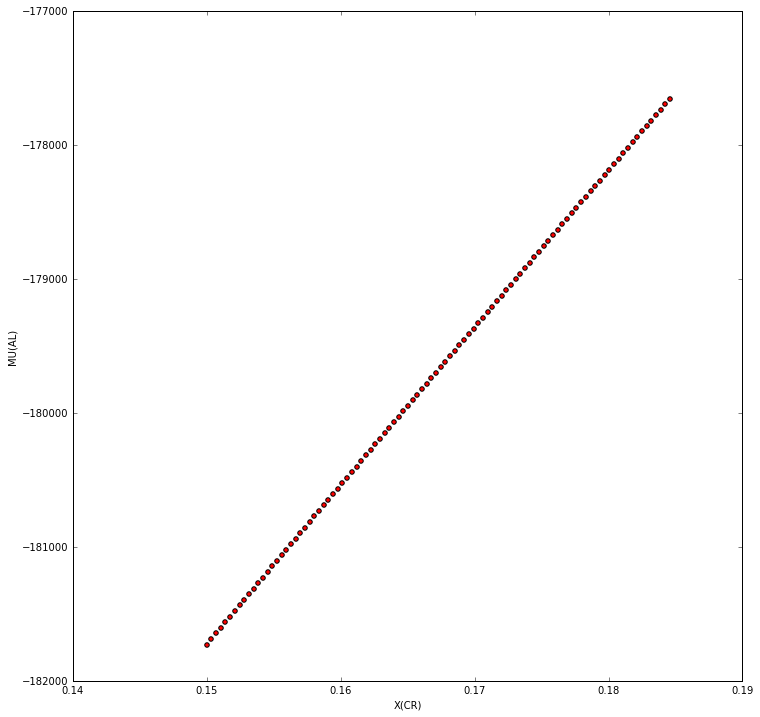

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,12))
ax = fig.gca()
X = eq.X_CR.values
ax.set_xlabel('X(CR)')
#ax.scatter(X, eq.GM)
ax.scatter(X, eq.MU.sel(component='AL'), label='Al', c='r')
ax.set_ylabel('MU(AL)')
#ax.scatter(X, eq.MU.sel(component='CR'), label='Cr', c='g')
#ax.scatter(X, eq.MU.sel(component='NI'), label='Ni', c='b')
plt.show()


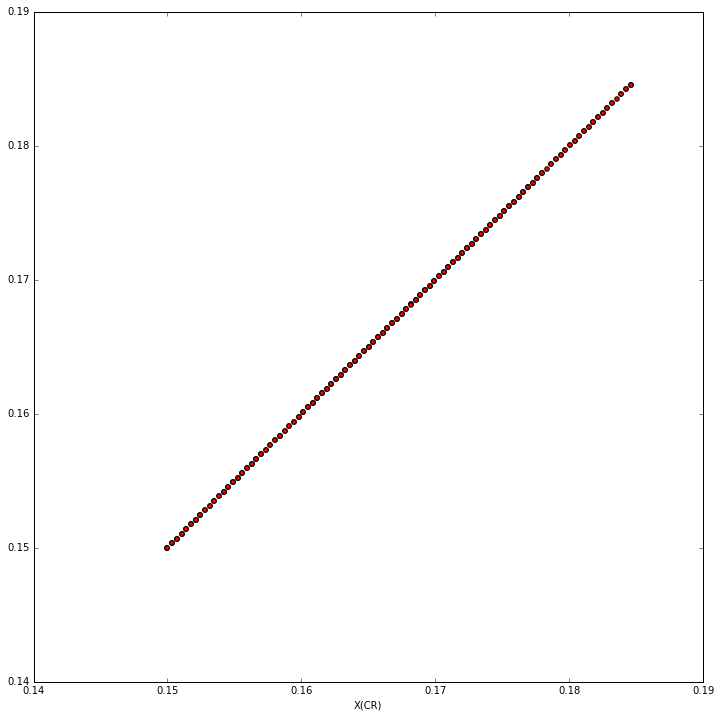

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
color_dict = {'FCC_A1': 'r', 'GAMMA_PRIME': 'g', '': 'w'}
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
X = eq.X_CR.values
ax.set_xlabel('X(CR)')
for phase, color in color_dict.items():
    phase_indices = np.nonzero(eq.Phase.values == phase)
    if len(phase_indices[0]) == 0:
        continue
    phase_array = eq.X.sel(component='CR').isel_points(dim='new', **dict(zip(eq.Phase.coords.keys(), phase_indices)))
    ax.scatter(phase_array.X_CR.values, phase_array.values, c=color)
plt.show()

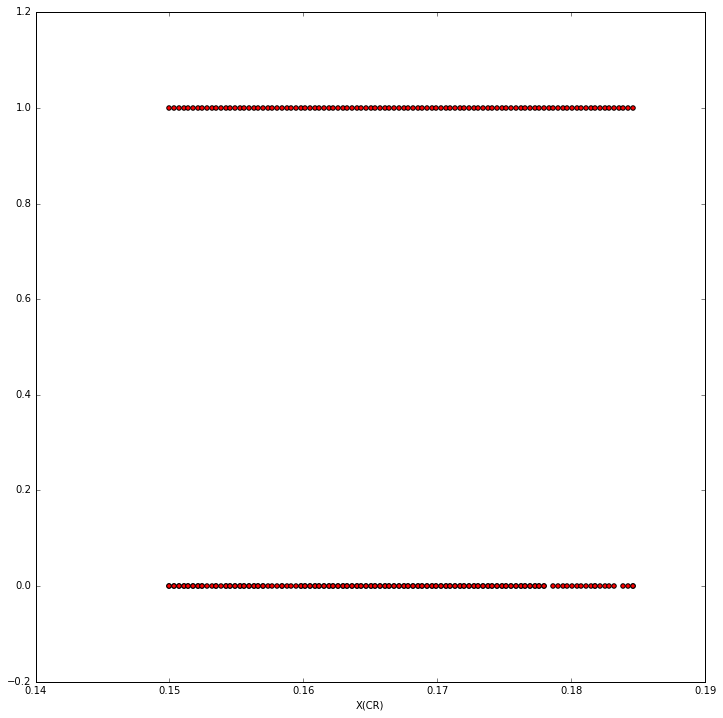

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
color_dict = {'FCC_A1': 'r', 'GAMMA_PRIME': 'g', '': 'w'}
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
X = eq.X_CR.values
ax.set_xlabel('X(CR)')
for phase, color in color_dict.items():
    phase_indices = np.nonzero(eq.Phase.values == phase)
    if len(phase_indices[0]) == 0:
        continue
    phase_array = eq.NP.isel_points(dim='new', **dict(zip(eq.Phase.coords.keys(), phase_indices)))
    ax.scatter(phase_array.X_CR.values, phase_array.values, c=color)
plt.show()

In [7]:
from pycalphad import calculate
res = calculate(db, ['AL', 'NI', 'CR', 'VA'], 'FCC_A1', pdens=100, T=1273, P=101325)

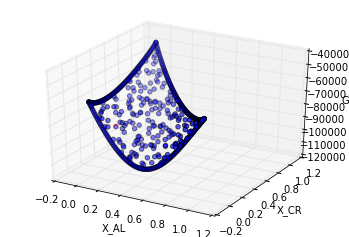

In [8]:
%matplotlib qt
import matplotlib.tri
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
triang = matplotlib.tri.Triangulation(np.squeeze(res.X.sel(component='AL').values), np.squeeze(res.X.sel(component='CR').values))
ax.scatter(np.squeeze(res.X.sel(component='AL').values), np.squeeze(res.X.sel(component='CR').values),
           np.squeeze(res.GM.values), c='b')
ax.set_xlabel('X_AL')
ax.set_ylabel('X_CR')
ax.set_zlabel('GM')
ax.plot(np.full_like(eq.X_CR, eq.X_AL), eq.X_CR, np.squeeze(eq.GM.values), c='r')
plt.show()